# Ejercicio 1

Desarrolle un método para generar una variable aleatoria con las siguientes densidades:

**a)**
\begin{equation*}
f(x) =
\begin{cases}
\displaystyle \frac{x - 2}{2} & \text{si } 2 \leq x \leq 3, \\
\displaystyle \frac{2 - x/3}{2} & \text{si } 3 \leq x \leq 6, \\
0 & \text{en otro caso}.
\end{cases}
\end{equation*}


In [67]:
#Módulos y librerías
from random import random
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [110]:
# # Simulación
def F(CUT:float) -> float:
    """
    Función de distribución acumulada de f
    Método de la transformada inversa

    Returns:
        float: valor de acumulada
    """
    U = random()
    if U < CUT:
        x = 2 + 2 * sqrt(U)
    else:
        x = 6 - (6 * sqrt((1-U)/3))
    return x

def f(x:float) -> float:
    """
    Función de densidad NO SIMULADA

    Args:
        x (float): Valor de entrada a transformar

    Returns:
        float: densidad del valor x
            - Si X<2 V X>=6 -> 0
            - Si no devuelve su densidad
    """
    return np.where(
        (x < 2) | (x > 6), 0,
        np.where(
            (x >= 2) & (x <= 3), (x - 2) / 2,
            np.where((x > 3) & (x <= 6), (2 - x / 3) / 2, 0)
        )
    )

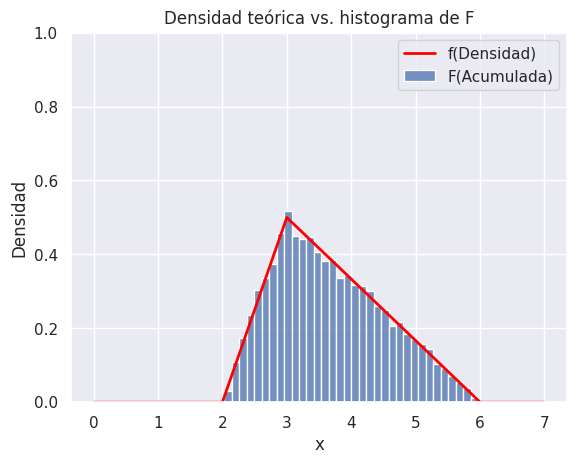

In [ ]:

#Función de acumulada
CUT = 1/4
Nsim = 10_000
F_accum = [F(CUT=CUT)  for _ in range(Nsim)]

#Densidad de probabilidad
x = np.linspace(0, 7, Nsim)

# Plot
sns.set_theme(style="darkgrid")
sns.histplot(F_accum, stat='density', label='F(Acumulada)')
sns.lineplot(x=x, y=f(x), color='red', linewidth=2, label='f(Densidad)')


# Estilo
plt.title('Densidad teórica vs. histograma de F')
plt.ylim()
plt.xlabel('x')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()

---
**b)**
\begin{equation*}
f(x) = 
\begin{cases}
\frac{6(x + 3)}{35} & \text{si } 0 \leq x \leq 1 \\\\
\frac{6x^2}{35} & \text{si } 1 \leq x \leq 2 \\\\
0 & \text{en otro caso}
\end{cases}
\end{equation*}

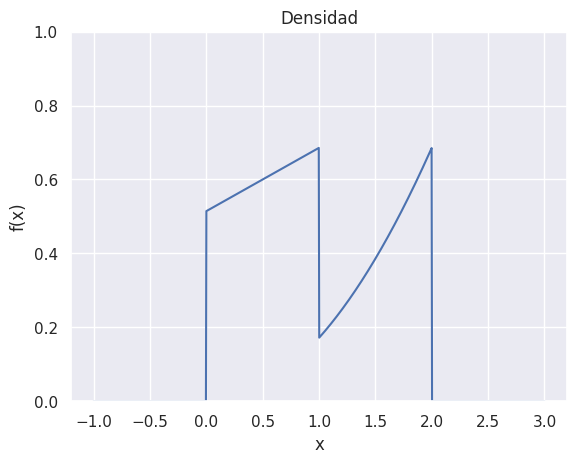

In [ ]:
#Densidad de probabilidad
def f(x:float) -> float:
    """
    Función de densidad NO SIMULADA

    Args:
        x (float): valor a transformar

    Returns:
        float: densidad de x
        - Si X<=0 V X>=2 -> 0
        - Si no devuelve su densidad
        
    """
    return np.where(
        (0 <= x) & (x <= 1),
        (6 * (x + 3)) / 35,
        np.where(
            (1 < x) & (x <= 2),
            (6 * x**2) / 35,
            0
        )
    )
    

x = np.linspace(-1, 3, 1000)
sns.lineplot(x=x, y=f(x))
# Estilo
plt.title('Función de densidad')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(0, 1)
plt.show()


Para encontrar F debemos aplicar el método de la *transformada inversa*.
Para ello, primero debemos encontrar F(x) y luego despejar x en función de u.

Por otro lado, tenemos que 
\begin{equation*}
F(x) = \int_{-\infty}^{x} f(t) dt
\end{equation*}

Al calcular la función de distribución acumulada (En papel) resulta:
\begin{equation*}
    F(x) =
    \begin{cases}
        0 & \text{si } x \leq 0 \\ 
        \frac{3}{35}\cdot(x^2+6x) & \text{si } 0 \leq x \leq 1 \\
        \frac{2}{35}\cdot x³ + \frac{19}{35} & \text{si } 1 < x \leq 2 \\
        1 & \text{si } 2 \leq x
    \end{cases}
\end{equation*}


---
Al calcular la inversa de $u$ para cada parte de F obtenemos que:
- **CASO** $U = \frac{3}{35}x² + \frac{18}{35}x$, al *calcular Baskhara* de $3x² + 18x + 35U$
$$
\begin{cases}
    x_1 =  \frac{-18+\sqrt{324+420U}}{6} \text{ (1)}\\
    x_2 =  \frac{-18-\sqrt{324+420U}}{6} \text{ (2)}
\end{cases}
$$

- Como x $\in [0,1]$ verifico qué ecuación está en el intervalo.
- Evalúo en $U = \frac{3}{35}x² + \frac{18}{35}x$ para $x=0 \wedge x=1$ (Los extremos)
- Obtengo que $U = 0 \wedge U=0.6$ respectivamente
- Evalúo en el sistema de ecuaciones para estos valores de $U$
- Tras evaluar en el sistema de ecuaciones resulta que la ecuación (1) está en el intervalo $[0,1]$ para todo $U \in (0,1)$ por ende tomo esa

---

- **CASO** $U = \frac{2}{35}x³ + \frac{19}{35}$, al *despejar* obtengo que:
$$
x = \sqrt[3]{\frac{35U-19}{2}} 
$$

- Como x $\in [1,2]$ verifico qué ecuación está en el intervalo.
- Evalúo en $U = \frac{2}{35}x³ + \frac{19}{35}$ para $x=1 \wedge x=2$ (Los extremos)
- Obtengo que $U = 0.6 \wedge U=1$ respectivamente 
- Tras evaluar en la ecuacion resulta que está en el intervalo $[1,2]$ para todo $U \in (0,1)$
---
Ahora para ver el *punto de corte*:

- Evalúo $F(1)$ pues $F$ está definida en intervalos $(-\infty, 0), [0,1), (1,2], [2,\infty)$.
- Luego $F(1) = \frac{3}{35}\cdot(1^2+6\cdot1)=\frac{3}{5}$

Finalmente el algoritmo:

In [65]:
def f(x:float) -> float:
    """
    Función de densidad NO SIMULADA

    Args:
        x (float): Valor de entrada a transformar

    Returns:
        float: densidad del valor x
            - Si X<=0 V X>=2 -> 0
            - Si no devuelve su densidad
    """
    return np.where(
        x <= 0, 0,
        np.where(
            x <= 1, (6 * (x + 3)) / 35,
            np.where(x <= 2, (6 * x**2) / 35, 0)
        )
    )


def F(CUT:float) -> float:
    """
    Función de distribución acumulada
    Método de la transformada inversa

    Returns:
        float: valor de acumulada
    """
    U = random()
    if U <= CUT:
        return ((-18) + sqrt(324 + 420*U)) / 6  
    else:
        return (((35*U) - 19) / 2) ** (1/3)
    

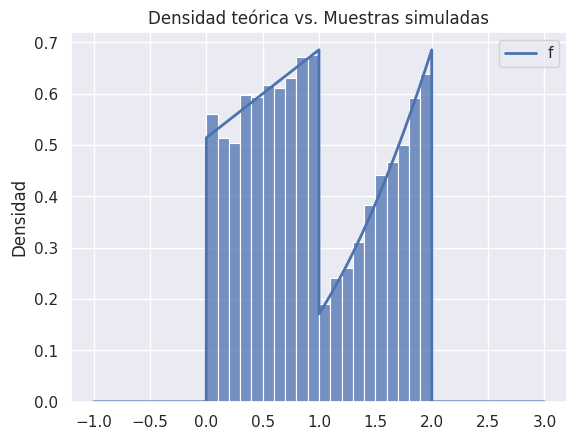

In [66]:
Nsim = 10000
CUT = 3 / 5
simulations = [F(CUT=CUT) for _ in range(Nsim)]

x_vals = np.linspace(-1, 3, Nsim)
f_vec = np.vectorize(f)

sns.set_theme(style="darkgrid")
sns.lineplot(x=x_vals, y=f(x_vals), label="f", linewidth=2)
sns.histplot(simulations, stat = 'density')
plt.title("Densidad teórica vs. Muestras simuladas")
plt.ylabel("Densidad")
plt.grid(True)
plt.show()